In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import requests
from io import StringIO
from io import BytesIO
from sklearn.model_selection import cross_val_score

# 로컬 파일
file_path = "./titanic.csv"
df = pd.read_csv(file_path)

# 웹 주소로 불러오기
# 일반 url은 HTML 파일이 반환되어 별도 처리 필요
# url = 'https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/titanic.csv'
# response = requests.get(url)

# csv 파일 가져오기
# data = StringIO(response.text)
# df = pd.read_csv(data)

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# 'Age' 결측치 처리: Age의 결측치는 평균값으로 채운다.
df['Age'].fillna(df['Age'].mean(), inplace=True)

# 모든 문자형 컬럼을 Label Encoding 처리
label_encoder = LabelEncoder()

# 문자형 컬럼을 찾아서 encoding 처리
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

/var/folders/l7/f8qz5_b95jgdg7h7qsldd3wh0000gn/T/ipykernel_35796/2260819898.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [7]:
df = df.dropna()
df.isnull().sum()
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
X = df.drop(['Survived', 'Name', 'Ticket', 'Fare', 'Embarked', 'Cabin'], axis = 1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


=== Decision Tree 성능 ===
정확도: 0.6872
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       105
           1       0.62      0.62      0.62        74

    accuracy                           0.69       179
   macro avg       0.68      0.68      0.68       179
weighted avg       0.69      0.69      0.69       179



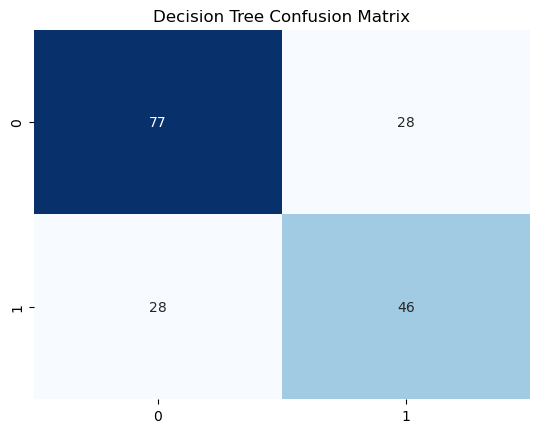


=== Random Forest 성능 ===
정확도: 0.8268
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.84      0.72      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



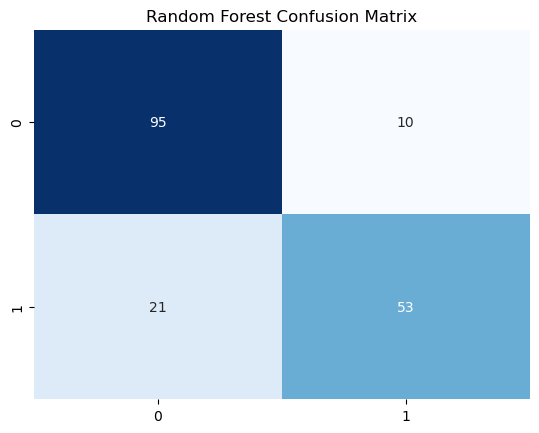

/opt/anaconda3/envs/DLvirt/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/DLvirt/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/DLvirt/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== SVM 성능 ===
정확도: 0.5866
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179



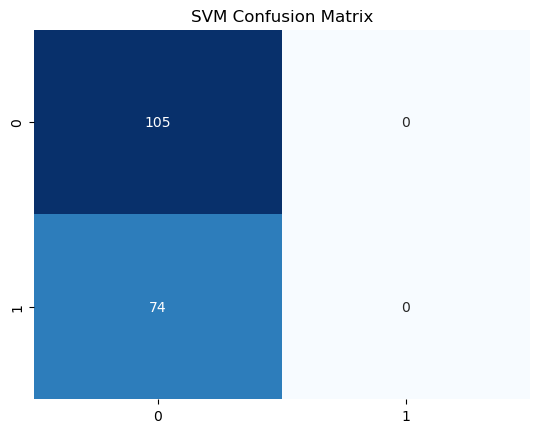


=== Logistic Regression 성능 ===
정확도: 0.8101
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



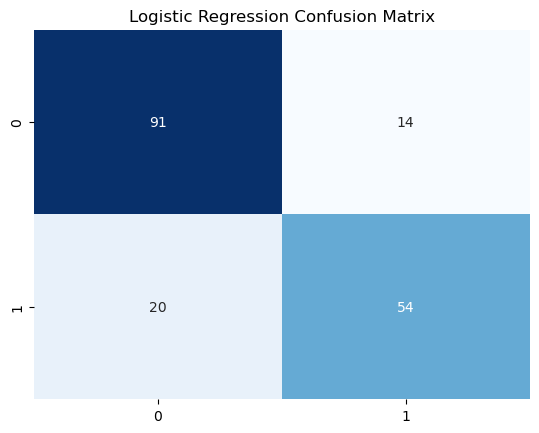


=== KNN 성능 ===
정확도: 0.5307
              precision    recall  f1-score   support

           0       0.58      0.71      0.64       105
           1       0.40      0.27      0.32        74

    accuracy                           0.53       179
   macro avg       0.49      0.49      0.48       179
weighted avg       0.51      0.53      0.51       179



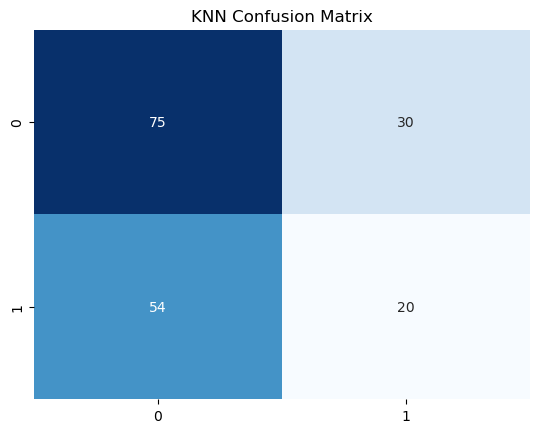

In [9]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'KNN' : KNeighborsClassifier(n_neighbors=3)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n=== {name} 성능 ===")
    print(f"정확도: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    
    # 혼동 행렬 시각화
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.show()